### Preparing the R environment

Install the required packages to be used inside the project.

In [16]:
########################################################
###### Suppressing warnings for a cleaner output #######
########################################################
options(warn=-1)

########################################################
#### Installing and importing the required packages ####
########################################################
library(lubridate)                 # library to help work with dates
install.packages("scales")         # Scale Functions for Visualization
library(scales)

install.packages("tidyverse")      # Collection of packages to model, transform, and visualize data
library(tidyverse)                 # for declaratively creating graphics
library(dplyr)

install.packages("cowplot")
library(cowplot)                   # Arrange 2 plots side-by-side https://stackoverflow.com/a/31223588/9332260

# Exploratory Data Analysis: COVID-19

In this Jupyter notebook, we perform a self expertimentation of Exploratory Data Analysis (EDA) for Denmark's COVID-19 cases in R. R is a language and environment for statistical computing and graphics (**cite: https://www.r-project.org/about.html**) which is perfect in this project as the goal is to visualize data and tell a conclusion/story based on real decisions.

## 1. Identify business problem

The first step to Exploratory Data Analysis (EDA) is to identify the business problem. The business case revolves around the understanding of the situation and the use of data to prevent spread of COVID-19 virus in Denmark. The aim is to analyze the data and compare against the decisions made and enforced by the officials and the health experts, primarily the two lockdowns from March and Decemberof 2020. This EDA is not a solution to the problem but the ambition is to understand if gathering factual data aided in effective decision making by the authorities. 

## 2. Data collection

The dataset used for this analysis was taken from [Our World in Data](https://ourworldindata.org/coronavirus/country/denmark?country=~DNK), which is a scientific online publication focusing on global problems. Its research team is based at the University of Oxford, whose work are based on global community of scholars (**cite: About us**). They claim to have the data for COVID-19 used in this analysis updated daily and have made it available to use freely. They also cite the source of raw data for COVID-19 Data Repository to be the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. (**cite**).

## 3. Data preparation

The data from Our World in Data is open-source, formatted and made available in different formats so people can choose how they want the data, for example: an Excel spreadsheet or a plain text file. For this analaysis, we chose to use the data as a CSV (comma-separated value) file for ease of use. In the following steps, we will go through the process of loading the data, tidying it and preparing it for the analysis.


### 3.1 Load the data into R and inspect

In the following steps, we load the raw data into this R notebook and inspect if it is workable and understandable. If not, we must proceed to transform the data. Without a clear understanding of data, the anaylsis is pointless.

After we load the data into the R notebook, we examine to ensure the target data exists. Hence, we test if data for Denmark exists in our dataframe. And for a sanity check, we also test for a fictional country Wakanda, expecting it to be falsy.

The dataset from Our World in Data consists the data for COVID-19 from all countries in the world. Since our focus is only in Denmark, we filter out only Denmark's data and store it in a varaible for later access.

In [17]:
list.files(".")

[1] "EDA-COVID.ipynb"      "world_covid_data.csv"

In [3]:
# Create a dataframe by reading the file containing the dataset

world_covid_data <- read.csv("world_covid_data.csv", encoding="UTF-8")

In [4]:
# Check if the data for the country we're interested in (Denmark), exists

"Denmark" %in% world_covid_data$location
"Wakanda" %in% world_covid_data$location # Failing test for sanity check

[1] TRUE

[1] FALSE

In [5]:
# use dplyr library to filter data where location is Denmark

denmark_covid_data <- filter(world_covid_data, location == "Denmark")

### 3.2 Initial inspection and feedback

Now that the target data is loaded and ready to be used, we inspect and conclude which transformations are needed. To do so, we print the inital few rows of the data.

In [18]:
head(denmark_covid_data)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
DNK,Europe,Denmark,2020-01-23,NA,0,NA,NA,0,NA,...,46682.51,0.2,114.767,6.41,19.3,18.8,NA,2.5,80.9,0.929
DNK,Europe,Denmark,2020-01-24,NA,0,NA,NA,0,NA,...,46682.51,0.2,114.767,6.41,19.3,18.8,NA,2.5,80.9,0.929
DNK,Europe,Denmark,2020-01-25,NA,0,NA,NA,0,NA,...,46682.51,0.2,114.767,6.41,19.3,18.8,NA,2.5,80.9,0.929
DNK,Europe,Denmark,2020-01-26,NA,0,NA,NA,0,NA,...,46682.51,0.2,114.767,6.41,19.3,18.8,NA,2.5,80.9,0.929
DNK,Europe,Denmark,2020-01-27,NA,0,NA,NA,0,NA,...,46682.51,0.2,114.767,6.41,19.3,18.8,NA,2.5,80.9,0.929
DNK,Europe,Denmark,2020-01-28,NA,0,0,NA,0,0,...,46682.51,0.2,114.767,6.41,19.3,18.8,NA,2.5,80.9,0.929


In the initial inspection, the data looks to be well prepared and ready to be used, thanks to the team at Our World in Data and their contributors. By well prepared in this context, we mean that the table doesn't require to be transposed (rotated), the date is already in the international ISO standard and the missing data weren't represented by some unusual characters and left empty, which R intelligently replaces by `NA`.

While there are much more columns than we need in this project, we will ignore them for now. While they do take additional resources, it is extra workload to remove them. And we have enough resorces to let them be and just ignore.

Such explanations are made here because in the previous iterations of this experiment with dataset from different source (StatisktikBanken), all of these issues needed to be addressed to be made usable.

### 3.3 Verify and update data types

The next step is to check the data types of the data loaded onto R. Since we read the data from a CSV file, R does not know what type of data certain inputs are. By default, it categorises unknown or mixed data types as `Factor` as they can store both strings and integers.

For example, the column (or variable) `date` should be of type `Date` but R understands it as of data type `Factor`. While this is fine and we can absolutely work with it, changing it to type of `Date` allows us to be more flexible and only show the month with the month's name, rather then the original value, such as `2020-04-20`.

In [20]:
str(denmark_covid_data)

'data.frame':	323 obs. of  50 variables:
 $ iso_code                          : chr  "DNK" "DNK" "DNK" "DNK" ...
 $ continent                         : chr  "Europe" "Europe" "Europe" "Europe" ...
 $ location                          : chr  "Denmark" "Denmark" "Denmark" "Denmark" ...
 $ date                              : Date, format: "2020-01-23" "2020-01-24" ...
 $ total_cases                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ new_cases                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ new_cases_smoothed                : num  NA NA NA NA NA 0 0 0 0 0 ...
 $ total_deaths                      : int  NA NA NA NA NA NA NA NA NA NA ...
 $ new_deaths                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ new_deaths_smoothed               : num  NA NA NA NA NA 0 0 0 0 0 ...
 $ total_cases_per_million           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ new_cases_per_million             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ new_cases_smoothed_per_million    : num  NA N

In [8]:
denmark_covid_data$iso_code <- as.character(denmark_covid_data$iso_code)
denmark_covid_data$continent <- as.character(denmark_covid_data$continent)
denmark_covid_data$location <- as.character(denmark_covid_data$location)
denmark_covid_data$date <- ymd(denmark_covid_data$date)
denmark_covid_data$tests_units <- as.character(denmark_covid_data$tests_units)
denmark_covid_data$total_deaths <- as.integer(denmark_covid_data$total_deaths)

## 4. Map data on graph

Now that we have changed the data types of the input data, we can start analyzing the data and gain understanding from it. To plot the data, we use the library `tidyverse` because of its flexibility and customization abilities.

In [9]:
# Define theme configs

single_plot_theme_config <- theme_light() +
theme(
    aspect.ratio=1,                                                        # Fixing aspect ratio
    plot.title = element_text(hjust = 0.5),                                # Center the title
    )


multiple_grid_plot_theme_config <- theme_light() +
theme(
    plot.title = element_text(hjust = 0.5, size = 10, face="bold"),      # Center the title, adjust font size and font face
    aspect.ratio = 1,                                                    # Fix aspect ratio
    legend.position=c(0.35, 0.95),                                       # Append the legend inside the plot
    plot.margin=unit(c(0,0,0,0.5),"cm"),                                 # Increase left margin so there's space between A & B
    axis.title = element_text(size = rel(0.8), face="bold")              # Adjust the size of x & y axis title
)


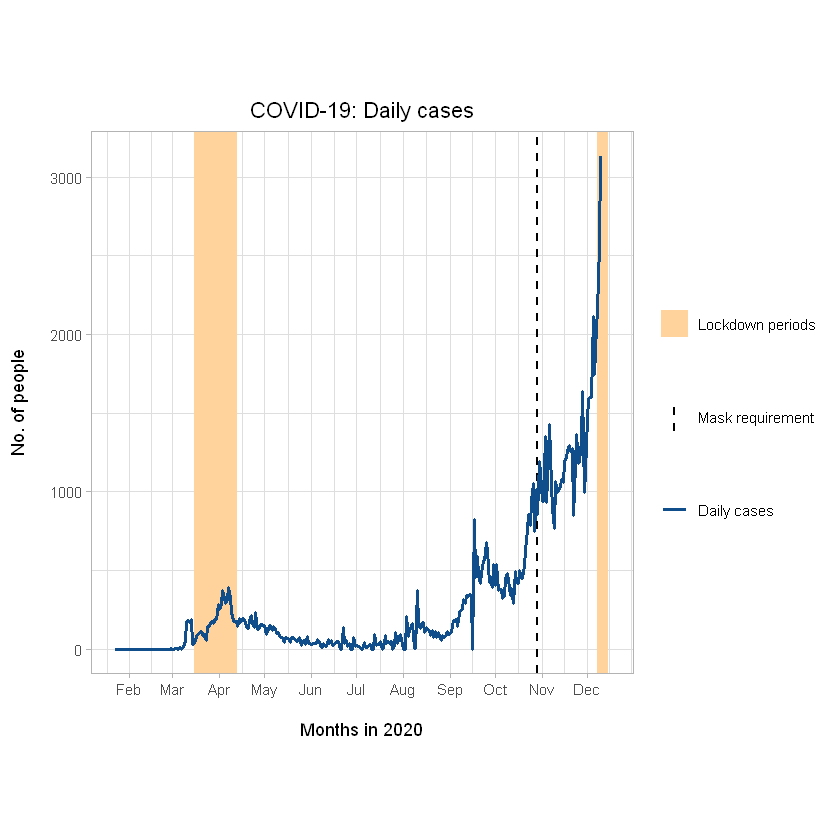

In [10]:
# Daily cases

ggplot(denmark_covid_data, aes(x = date)) +

geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-15"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +


geom_line(aes(y = new_cases, color = "dodgerblue4"), lwd = 1) +
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people\n") +                                    # Label for y-axis

ggtitle("COVID-19: Daily cases") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("dodgerblue4"),
                     labels = c("Daily cases"),
                     guide = "legend") +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) + 
single_plot_theme_config

### 4.1 Deaths, hospitalized and lockdowns

Starting with one of the most meaningful and significant plotting, we analyze the data for the number of deaths and hospitalized. Along with that, we also emphasize on the 2 lockdowns enforced by the state officials, the first one from March 15, 2020 to April 13, 2020 and the recent one starting from December 9, 2020 onwards.

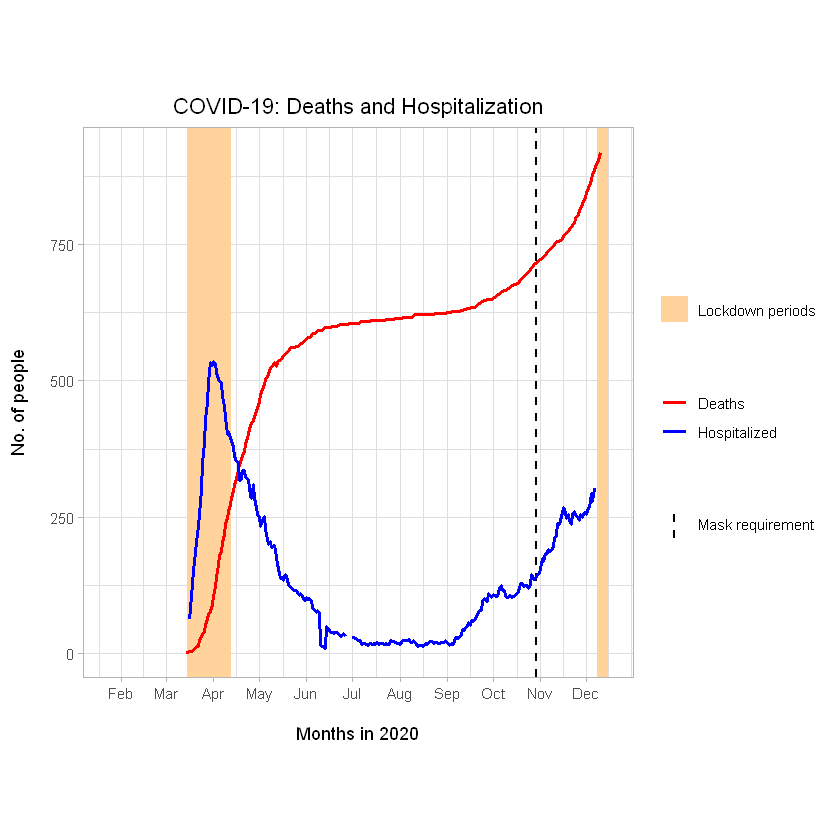

In [11]:

ggplot(denmark_covid_data, aes(x = date)) +                                # Specify the data frame and x-axis for the plot
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-15"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +

geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +

geom_line(aes(y = total_deaths, color = "red"), lwd = 1) +                 # Line plot for deaths
geom_line(aes(y = hosp_patients, color = "blue"), lwd = 1) +               # line plot for hospitalized

scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people\n") +                                    # Label for y-axis

ggtitle("COVID-19: Deaths and Hospitalization") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("red", "blue"),
                     labels = c("Deaths", "Hospitalized"),
                     guide = "legend") +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) + 
single_plot_theme_config

After the initial plotting, it is clear that there was a strong impact of COVID-19 around late March--early April. The number of people who were dying due to COVID-19, as indicated by red line, and who were hospitalized, as indicated by the blue line, increased sharply. The first, month-long lockdown was imposed during this period, as indicated by the soft-orange shade. The result of the lockdown was effective as the number of reported hospitalization started to decline and kept declining over the next few months. The number of deaths was still rising at the end of the first lockdown, but started to stabilize soon after.

This was a positive indication that the imposed lockdown was effective in controlling the spread of the virus.

As the restictions started to loosen up, the public started to gather in larger numbers, which was an opportunity for the virus to spread again. This is indicated by the rise on both total deaths and hospitalized starting September. To control the rapid increase, the government mandated the use of mask on all public places starting October 29, represented by the black, dashed line.

Ever since, the numbers started to grow. The plot above shows a sharp incline starting November. And with the holidays starting, the government imposed second lockdown starting December 09, 2020, which is the date of conducting this experiment. This was an attempt to reduce the number of gatherings and parties, and limit them to families to control the spread of the COVID-19.

### 4.2 Total confirmed cased and total tested

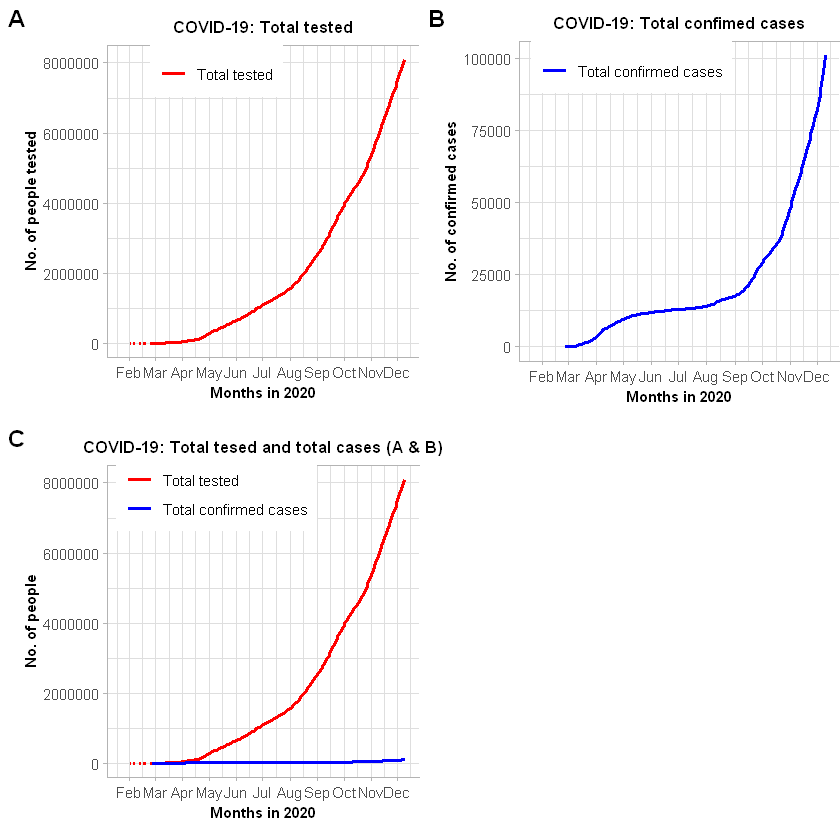

In [12]:
##########################################################################################################################
############ Step 1: First we create a plot "A" for total number of people tested and assign it to a variable ############
##########################################################################################################################

total_tested_plot <- ggplot(denmark_covid_data, aes(x = date)) +        # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_tests, color = "red"), lwd = 1) +               # Line plot for total number of peple tested
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +    # Improving the x-axis to show all months
xlab("Months in 2020") +                                                # Label for x-axis
scale_y_continuous("No. of people tested",                              # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)   # Change from exponentials to human readable numbers
                   ) +
ggtitle("COVID-19: Total tested") +                                     # Title for the plot A
scale_color_identity(name = "",                                         # Legend for the line plot
                     breaks = "red",
                     labels = "Total tested",
                     guide = "legend"
                     ) +
multiple_grid_plot_theme_config


##########################################################################################################################
############Step 2: Then we create a plot "B" for total number of confirmed cases and assign it to a variable ###########
##########################################################################################################################

total_confirmed_cases_plot <- ggplot(denmark_covid_data, aes(x = date)) +   # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_cases, color = "blue"), lwd = 1) +                  # Line plot for total confirmed cases
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +        # Improving the x-axis to show all months
xlab("Months in 2020") +                                                    # Label for x-axis
scale_y_continuous("No. of confirmed cases",                                # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)
                   ) +
ggtitle("COVID-19: Total confimed cases") +                                 # Title for the plot
scale_color_identity(name = "",                                             # Legend for the line plot
                     breaks = "blue",
                     labels = "Total confirmed cases",
                     guide = "legend"
                     ) +
multiple_grid_plot_theme_config


##########################################################################################################################
##################### Step 3: Then we create a combined plot for "A" & "B" and assign it to a variable ###################
##########################################################################################################################

combined_plot <- ggplot(denmark_covid_data, aes(x = date)) +             # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_tests, color = "red"), lwd = 1) +                # Line plot for total number of peple tested
geom_line(aes(y = total_cases, color = "blue"), lwd = 1) +               # Line plot for total confirmed cases
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +     # Improving the x-axis to show all months
xlab("Months in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people",                                      # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)
                   ) +
ggtitle("COVID-19: Total tesed and total cases (A & B)") +               # Title for the plot
scale_color_identity(name = "",                                          # Legend for the line plot
                     breaks = c("red", "blue"),
                     labels = c("Total tested", "Total confirmed cases"),
                     guide = "legend") +
multiple_grid_plot_theme_config



##########################################################################################################################
####################################### Step 4: Finally make a grid of all 3 plots ######################################
##########################################################################################################################
plot_grid(total_tested_plot, total_confirmed_cases_plot, combined_plot, labels = "AUTO")


Correlation and causation

Dependent variable - Y axis
Independent variable - X axis

Scatter plot

Plot to show the correlation between total tested and total cases

`geom_smooth()` using formula 'y ~ x'



Call:
lm(formula = denmark_covid_data$total_cases ~ denmark_covid_data$total_tests)

Residuals:
    Min      1Q  Median      3Q     Max 
-9887.2 -4118.7   101.2  4273.5 22046.9 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1.604e+03  4.858e+02   3.302  0.00108 ** 
denmark_covid_data$total_tests 9.159e-03  1.515e-04  60.435  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5884 on 285 degrees of freedom
  (36 observations deleted due to missingness)
Multiple R-squared:  0.9276,	Adjusted R-squared:  0.9274 
F-statistic:  3652 on 1 and 285 DF,  p-value: < 2.2e-16


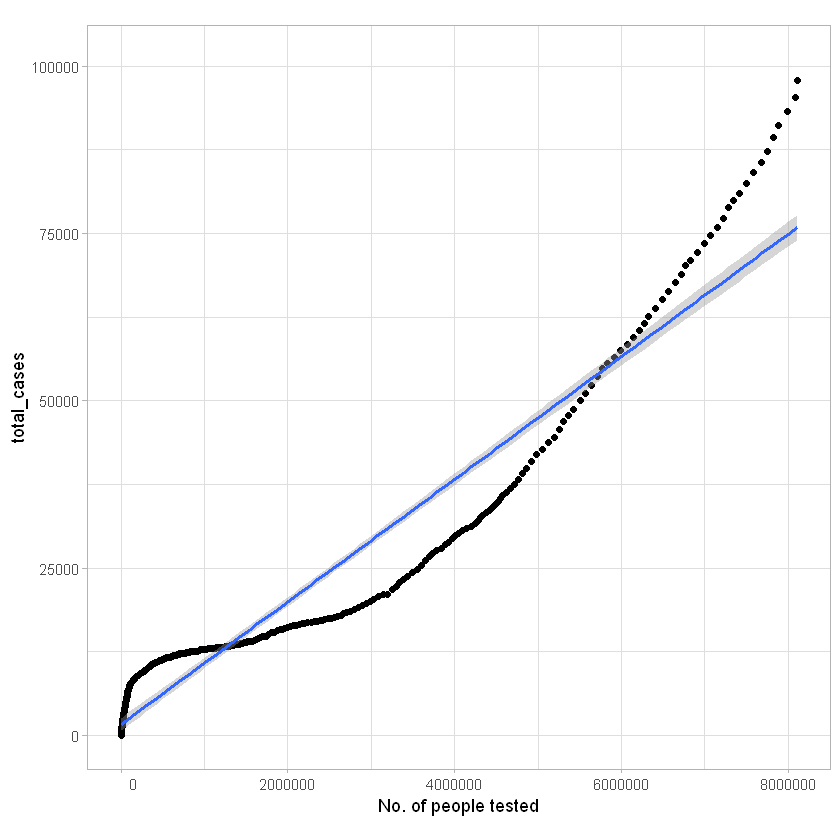

In [13]:
ggplot(denmark_covid_data, aes(x=total_tests, y=total_cases)) +
geom_point() +
geom_smooth(method = "lm") +
scale_x_continuous("No. of people tested",                              # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)   # Change from exponentials to human readable numbers
                   ) +
single_plot_theme_config

modFit0 <- lm(denmark_covid_data$total_cases~denmark_covid_data$total_tests)
summary(modFit0)


**TODO:** 
1. Face mask mandate when?
    - On public transport: August 22, On public places/businesses: October 29
2. Data for daily cases?
    - https://ourworldindata.org/coronavirus/country/denmark?country=~DNK
3. Redo with English data
    - https://www.statistikbanken.dk/SMIT1
4. Predictions
5. Conclusions

In [14]:
str(denmark_covid_data)

'data.frame':	323 obs. of  50 variables:
 $ iso_code                          : chr  "DNK" "DNK" "DNK" "DNK" ...
 $ continent                         : chr  "Europe" "Europe" "Europe" "Europe" ...
 $ location                          : chr  "Denmark" "Denmark" "Denmark" "Denmark" ...
 $ date                              : Date, format: "2020-01-23" "2020-01-24" ...
 $ total_cases                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ new_cases                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ new_cases_smoothed                : num  NA NA NA NA NA 0 0 0 0 0 ...
 $ total_deaths                      : int  NA NA NA NA NA NA NA NA NA NA ...
 $ new_deaths                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ new_deaths_smoothed               : num  NA NA NA NA NA 0 0 0 0 0 ...
 $ total_cases_per_million           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ new_cases_per_million             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ new_cases_smoothed_per_million    : num  NA N